# ¡Hola Kevin! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


------

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Kevin excelente trabajo completando este proyecto! Has demostrado habilidades destacables en el tratamiento de los datos, análisis exploratorio y visualización efectiva de información.

En el apartado de las pruebas de hipótesis aunque, de manera general, la implementación es correcta, para futuros análisis te recomiendo incluir una etapa previa con la prueba de Levene con el fin de verificar la igualdad de varianzas, lo cual contribuye a asegurar la validez estadística de los resultados.

En general, desarrollaste un muy buen análisis en este caso de estudio, sigue manteniendo esta combinación de habilidades técnicas, analíticas y estratégicas en tus futuros proyectos.

¡Te deseo muchos éxitos en tu próximo Sprint! 🚀

*Estado del Proyecto:* **Aprobado**

</div>

------

In [1]:
# importamos las respectivas librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# cargamos el dataset
df_games = pd.read_csv('/games.csv')

In [3]:
# imprimimos informacion del dataset
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# imprimimos las primeras 5 filas
print(df_games.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [5]:
# cambiamos los nombres de las columnas a minusculas
#imprimimos como estan actualmente los nombres de las columnas
print(df_games.columns.tolist())

['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating']


In [6]:
# cambiamos el nombre de las columnas a minusculas
df_games.columns = df_games.columns.str.lower()
# comprobamos si se hizo el cambio
df_games.columns
    

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente las funciones `info` y `head`, esto te permite hacer una primera revisión de los datos, su estructura y contenido. 

Además es una excelente práctica convertir los nombres de las columnas a minúsculas para facilitar el trabajo posterior y evitar errores por tener una combinación de mayúsculas y minúsculas.

</div>

# buscamos datos problematicos en las columnas.

se observa que la columna year_of_release es de tipo float y user_score esta tipo object 

In [7]:
# observamos los tipos de datos actuales
df_games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [8]:
# buscamos valores problematicos en la columna year_of_release
df_games['year_of_release'].unique() # imprimimos los datos unicos

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [9]:
# buscamos cuantos valores ausentes hay en esta columna
print(df_games['year_of_release'].isnull().sum())

269


In [10]:
# buscamos valores problematicos en la columna user_score
print(df_games['user_score'].unique()) # imprimimos los datos unicos

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [11]:
# contamos los valores de esta columna
print(df_games['user_score'].value_counts())

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.2       2
0.3       2
0.5       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64


In [12]:
# buscamos datos problematicos en la columna critic_score
print(df_games['critic_score'].isnull().sum()) # contamos datos nulos

8578


In [13]:
# imprimimos el rango en el que estan los datos
print(f"minimo : {df_games['critic_score'].min()}")
print(f"maximo : {df_games['critic_score'].max()}")

minimo : 13.0
maximo : 98.0


In [14]:
# buscamos datos problematicos en la columna rating
print(df_games['rating'].unique()) # imprimimos valores unicos

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [15]:
# contamos los valores de esta columna
print(df_games['rating'].value_counts())

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64


# corregimos datos y cambiamos el tipo de dato


comenzamos con la columna user_score, existen valores iguales a TBD los cuales vamos a cambiarlos por np.nan(dato en blanco que no afecta en calculos estadisticos, se ignora) y no por 0, debido a que si lo reemplazamos por 0 estariamos dandole una mala puntuacion en este caso TBD nos dice que aun no hay una puntuacion de usuarios para este juego; No es necesario rellenar los valores ausentes, podrian significar que el juego es muy antiguo o casi no lo juegan. Lo mismo sucede para las columnas critic_score y raiting, No es necesario rellenar los datos nulos.




In [16]:
# cambiamos el valor de TBD por nan en la columna user_score
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)
# cambiamos el tipo de dato a float
df_games['user_score'] = df_games['user_score'].astype('float64')
# verificamos el cambio
print(df_games['user_score'].dtype)
# comprobamos valores ausentes
print(df_games['user_score'].isnull().sum())


float64
9125


en el caso de la columna year_of_release los valores nulos los podremos rellenar con la mediana, la moda nos podria desviar hacia un unico año,  la media nos daria un numero flotante por ejemplo 2025.5 lo cual estaria mal

In [17]:
# llenamos los datos nulos de la columna year_of_release con la mediana
df_games['year_of_release'] = df_games['year_of_release'].fillna(df_games['year_of_release'].median())
# convertimos a entero
df_games['year_of_release'] = df_games['year_of_release'].astype('int64')
#verificamos cambios
print(df_games['year_of_release'].isnull().sum())
print(df_games['year_of_release'].dtype)

0
int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Con respecto al manejo de datos faltantes, las estrategias que planteas son válidas para el contexto del caso de estudio; no obstante, acá te comparto un artículo donde hablan sobre diferentes [métodos de manejo de datos faltanes](https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python) que seguro te serán útiles en futuros proyectos.

</div>

In [18]:
# calculamos las ventas totales de las regiones para cada juego

# creamos una nueva columna
df_games['ventas_totales'] = df_games['na_sales']+ df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
# verificamos
print(df_games[['name','na_sales','eu_sales','jp_sales','other_sales','ventas_totales']].head())

                       name  na_sales  eu_sales  jp_sales  other_sales  \
0                Wii Sports     41.36     28.96      3.77         8.45   
1         Super Mario Bros.     29.08      3.58      6.81         0.77   
2            Mario Kart Wii     15.68     12.76      3.79         3.29   
3         Wii Sports Resort     15.61     10.93      3.28         2.95   
4  Pokemon Red/Pokemon Blue     11.27      8.89     10.22         1.00   

   ventas_totales  
0           82.54  
1           40.24  
2           35.52  
3           32.77  
4           31.38  


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo obteniendo las ventas totales. Si quieres optimizar la suma puedes hacerlo así:

```python
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

```

</div>

# Analisis de datos

In [19]:
# hallamos los juegos lanzados en diferentes años

juegos_por_año = df_games['year_of_release'].value_counts().sort_index()
print(juegos_por_año)

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1466
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64


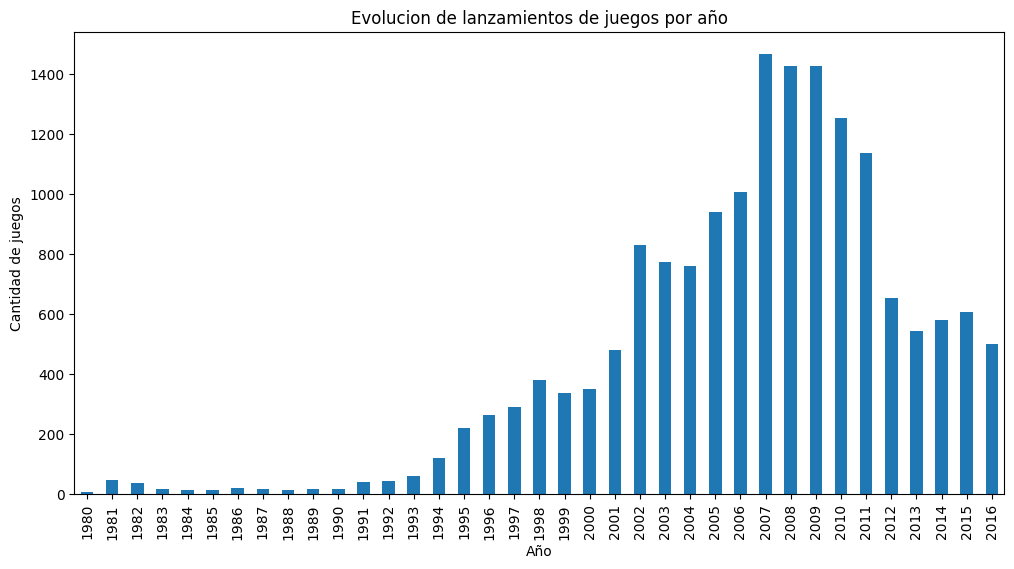

In [20]:
# graficamos
juegos_por_año.plot(
    kind= 'bar',
    figsize=(12,6),
    title = 'Evolucion de lanzamientos de juegos por año',
    xlabel = 'Año',
    ylabel = 'Cantidad de juegos'
)
plt.show()


se observa que en entre los años 2007 y 2009 se lanzo el mayor numero de juegos, a partir del 2009 hubo un descenso gradual pero en el año 2012 la caida fue considerab

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Muy buen trabajo! La gráfica muestra un crecimiento hasta 2008-2009, seguido de una caída en lanzamientos. Esto podría deberse al éxito de consolas como PS3 y Xbox 360, y luego a cambios en la industria: más enfoque en calidad, auge de juegos móviles, distribución digital o la crisis de 2008.

</div>

# Variacion ventas de una plataforma a otra

In [21]:
# agrupamos los datos de ventas por plataforma 

ventas_plataforma = df_games.groupby('platform')['ventas_totales'].sum().sort_values(ascending = False)
# imprimimos
print(ventas_plataforma)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: ventas_totales, dtype: float64


In [22]:
# imprimimos las primeras top 5 plataformas
print(ventas_plataforma.head(5))

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: ventas_totales, dtype: float64


In [23]:
# seleccionamos las primeras 10 plataformas
top_plataformas = ventas_plataforma.head(5).index
# creamos una tabla de evolucion temporal para las top plataformas
evolucion_top_plataformas = df_games[df_games['platform'].isin(top_plataformas)].groupby(['year_of_release','platform'])['ventas_totales'].sum().unstack(fill_value=0)
# filtramos el dataframe df_games por plataforma con la condicion de que este en top_plataformas y luego agrupamos por año de lanzamiento y plataforma
# sumamos las ventas totales y rellenamos los valores faltantes con 0 con unstackpara poder graficar posteriormente sin problemas
print(evolucion_top_plataformas)

platform             DS     PS2     PS3     Wii    X360
year_of_release                                        
1985               0.02    0.00    0.00    0.00    0.00
2000               0.00   39.17    0.00    0.00    0.00
2001               0.00  166.43    0.00    0.00    0.00
2002               0.00  205.38    0.00    0.00    0.00
2003               0.00  184.31    0.00    0.00    0.00
2004              17.27  211.81    0.00    0.00    0.00
2005             130.14  160.66    0.00    0.00    8.25
2006             119.81  103.42   20.96  137.15   51.62
2007             150.28   98.20   81.50  169.10  105.59
2008             145.31   53.90  118.52  171.32  135.26
2009             119.54   26.40  130.93  206.97  120.29
2010              85.02    5.64  142.17  127.95  170.03
2011              26.18    0.45  156.78   59.65  143.84
2012              11.01    0.00  107.36   21.71   99.74
2013               1.54    0.00  113.25    8.59   88.58
2014               0.00    0.00   47.76    3.75 

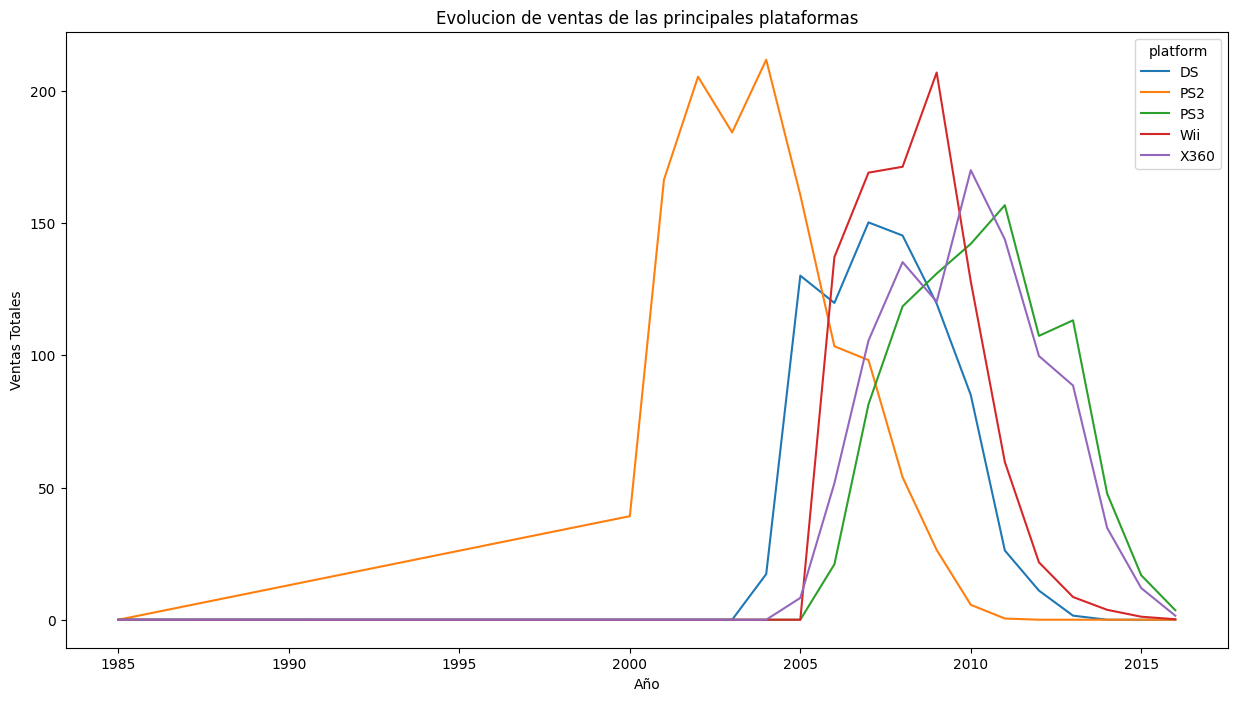

In [24]:
# graficamos

evolucion_top_plataformas.plot(
    figsize=(15,8),
    title = 'Evolucion de ventas de las principales plataformas',
    xlabel = 'Año',
    ylabel = 'Ventas Totales'
)
plt.show()

creamos distribuciones por año

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

El gráfico confirma que cada generación de consolas tiene un ciclo de vida con un período de auge y una posterior caída, lo que sugiere que el éxito de un videojuego está fuertemente vinculado al momento en el que es lanzado dentro de ese ciclo. Buen trabajo

</div>

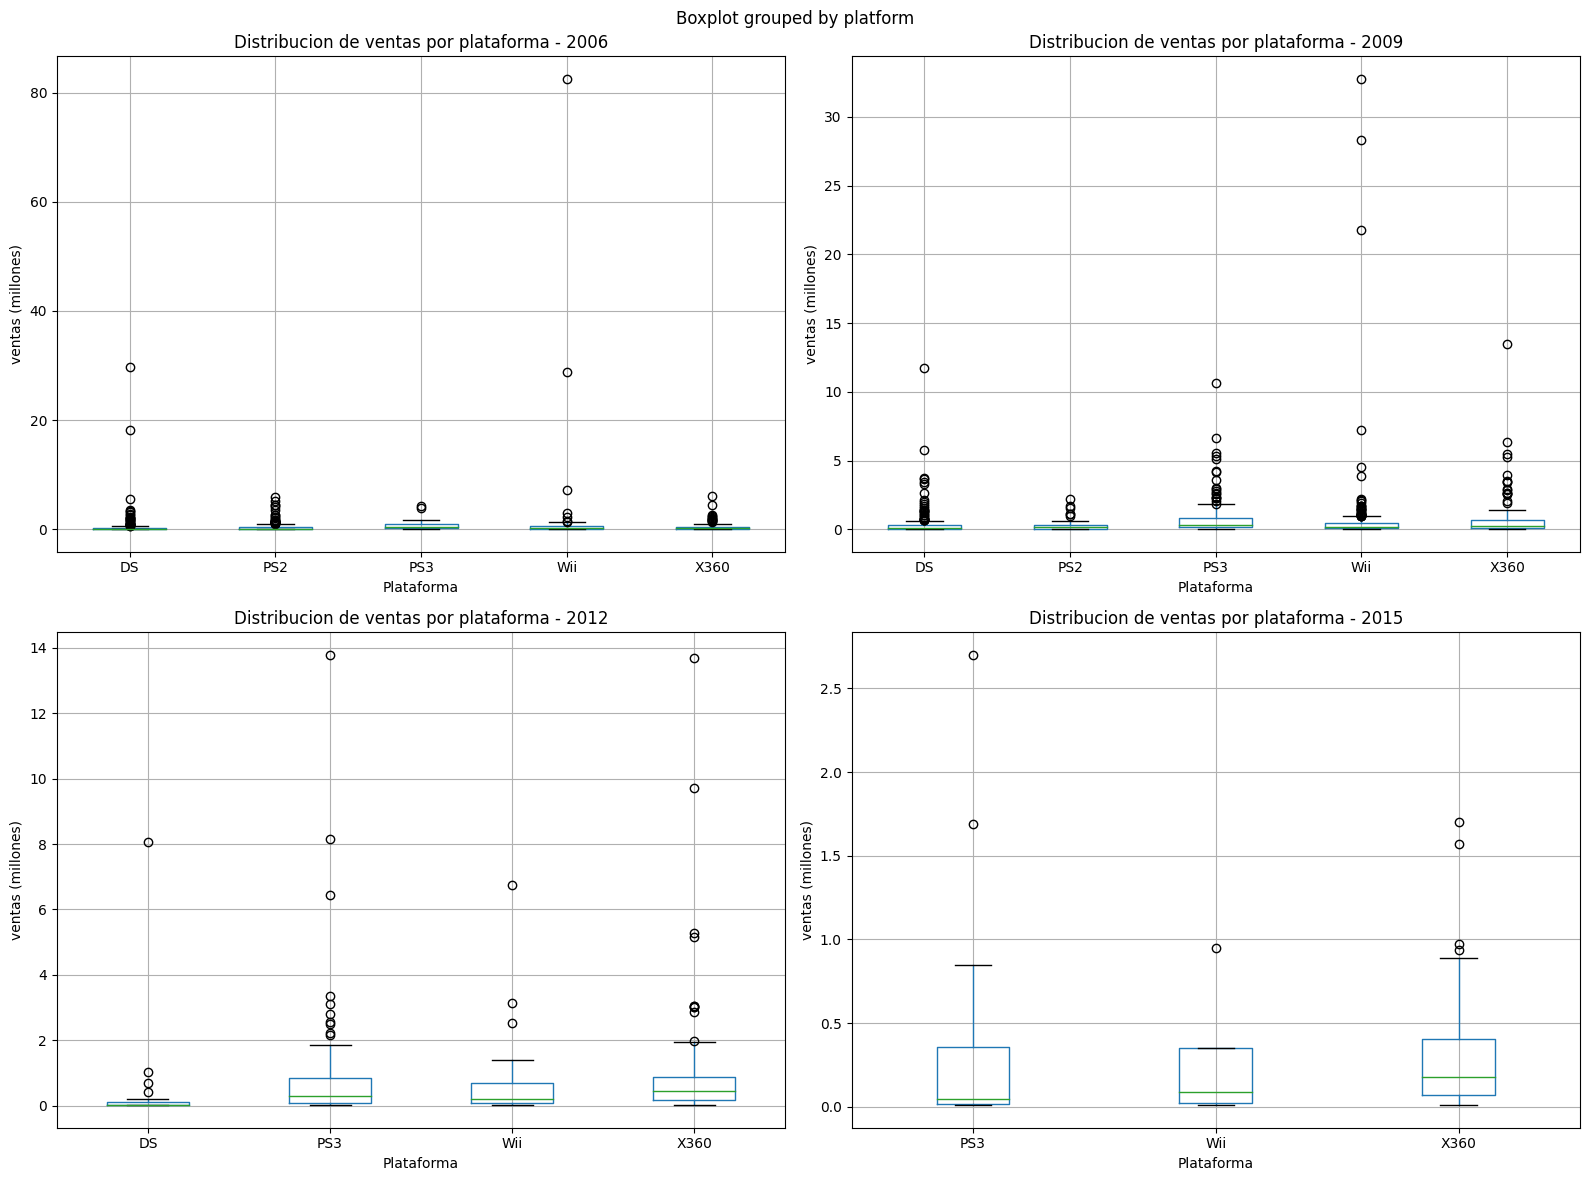

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))
# esto nos devuelve dos objetos fig -> figura competa y axes un array con los graficos(2x2)
años_clave = [2006, 2009, 2012, 2015]  # años representativos

for i, año in enumerate(años_clave):
    ax = axes[i//2, i%2]
    # datos del año de plataformas top
    datos_año = df_games[(df_games['year_of_release']== año) & (df_games['platform'].isin(top_plataformas))]

    # graficamos con boxplot para ver distribucion de ventas en los años mas representativos
    datos_año.boxplot(
        column = 'ventas_totales',
        by = 'platform',
        ax = ax
    )
    ax.set_title(f'Distribucion de ventas por plataforma - {año}')
    ax.set_xlabel('Plataforma')
    ax.set_ylabel('ventas (millones)')
# ajustamos automaticamente los espacios entre graficos
plt.tight_layout()
plt.show()
    

identificamos plataformas que "murieron"

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>


Muy buen trabajo obteniendo los *box-plot*. Estos muestran que la mayoría de los juegos tienen ventas bajas, hay valores extremos que dominan en cada plataforma. Esto muestra que el éxito de un juego no depende solo de la consola, sino también de su popularidad y estrategia de marketing.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Como sugerencia, cuando tengas gráficas *box-plot* con cajas muy "estrechas" debido a la presencia de numerosos datos atípicos, considera incluir una versión adicional usando escala logarítmica o ajustando el rango del eje Y. Esto facilitará la comparación y el análisis de los datos.

</div>
</div>

In [26]:
# analizamos el ultimo año donde las ventas fueron significativas para cada plataforma

ultimo_año_ventas = df_games.groupby('platform')['year_of_release'].max().sort_values()
primer_año_ventas = df_games.groupby('platform')['year_of_release'].min().sort_values()
# creamos tabla de ciclo de vida
ciclo_de_vida = pd.DataFrame({
    'primer_año' : primer_año_ventas,
    'ultimo_año' : ultimo_año_ventas,
    'duracion' : ultimo_año_ventas - primer_año_ventas,
    'ventas_totales' : ventas_plataforma
}).sort_values('ventas_totales', ascending=False)

# imprimimos
print('Ciclo de vida de las principales plataformas:')
print(ciclo_de_vida.head(15))

Ciclo de vida de las principales plataformas:
          primer_año  ultimo_año  duracion  ventas_totales
platform                                                  
PS2             2000        2011        11         1255.77
X360            2005        2016        11          971.42
PS3             2006        2016        10          939.65
Wii             2006        2016        10          907.51
DS              1985        2013        28          806.12
PS              1994        2007        13          730.86
GBA             2000        2007         7          317.85
PS4             2013        2016         3          314.14
PSP             2004        2015        11          294.05
PC              1985        2016        31          259.52
3DS             2007        2016         9          259.00
XB              2000        2008         8          257.74
GB              1988        2007        19          255.46
NES             1983        1994        11          251.05
N64       

observamos que en el ciclo de vida de las plataformas en cuanto a ventas totales , PS2 lidera con 1255.77 ventas totales

In [27]:
# identificamos plataformas que terminaron antes del 2015

año_actual = 2016   # ultimo año en los datos
plataformas_muertas = ciclo_de_vida[(ciclo_de_vida['ultimo_año']<2015)&
    (ciclo_de_vida['ventas_totales']>50)  # que fueron significativas
    ].sort_values('ventas_totales', ascending = False)
# imprimimos
print(f'Plataformas que "murieron" (populares peron ya sin ventas):')
print(plataformas_muertas[['ultimo_año','ventas_totales']])

Plataformas que "murieron" (populares peron ya sin ventas):
          ultimo_año  ventas_totales
platform                            
PS2             2011         1255.77
DS              2013          806.12
PS              2007          730.86
GBA             2007          317.85
XB              2008          257.74
GB              2007          255.46
NES             1994          251.05
N64             2007          218.68
SNES            1999          200.04
GC              2007          198.93
2600            2007           96.98


In [28]:
# Analisis patrones temporales

print('Analisis de ciclo de vida:')
print(f'Duracion promedio de una plataforma : {ciclo_de_vida["duracion"].mean():.1f}')
print(f'Duracion mediana: {ciclo_de_vida["duracion"].median():.1f} años')
      

Analisis de ciclo de vida:
Duracion promedio de una plataforma : 8.9
Duracion mediana: 9.0 años


# correlacion entre reseñas y las ventas plataforma popular.

In [29]:
# elegimos la plataforma y filtramos los datos con reseñas disponibles

ps3_data = df_games[
    (df_games['platform']=='PS3') &
    (df_games['critic_score'].notna()) &
    (df_games['user_score'].notna())
    ].copy()
# imprimimos
print(f'Juegos de PS3 con reseñas: {len(ps3_data)}')

Juegos de PS3 con reseñas: 790


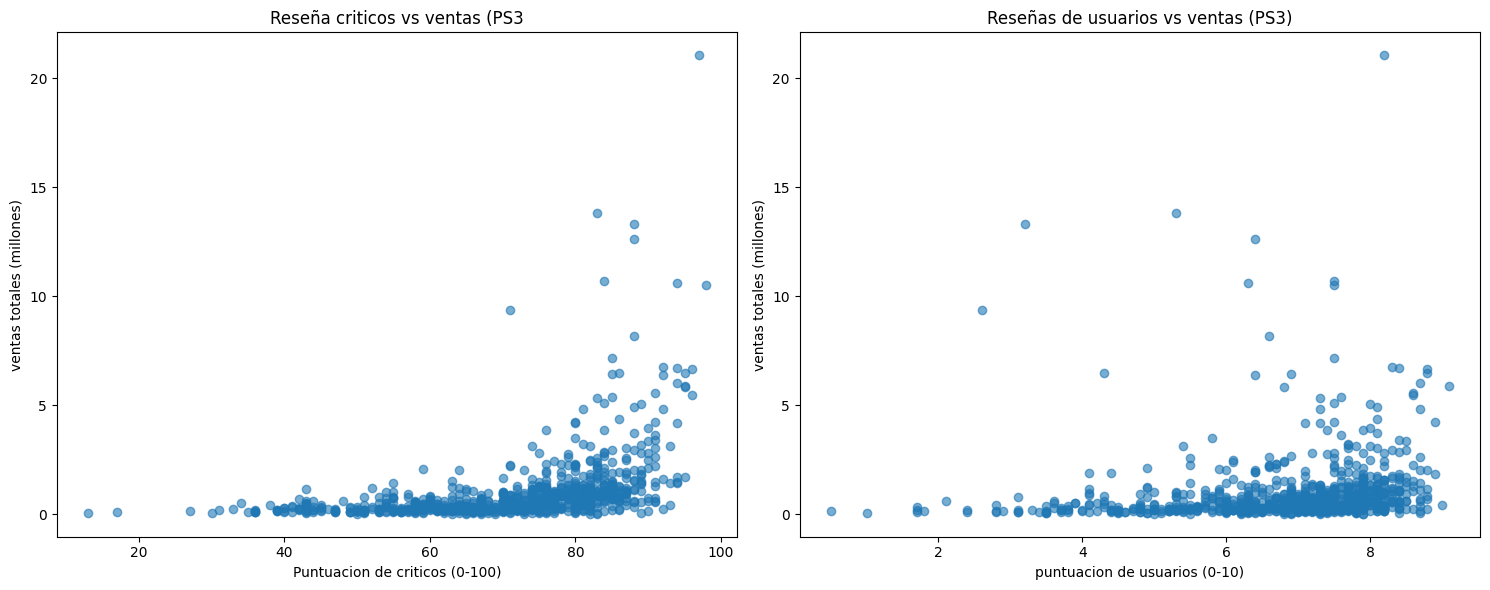

In [30]:
# graficamos y comparamos

# configuracion de graficos
fig, axes = plt.subplots(1,2, figsize=(15,6))

# grafico critic sccore vs ventas
axes[0].scatter(ps3_data['critic_score'], ps3_data['ventas_totales'], alpha=0.6)
axes[0].set_xlabel('Puntuacion de criticos (0-100)')
axes[0].set_ylabel('ventas totales (millones)')
axes[0].set_title('Reseña criticos vs ventas (PS3')

# grafico user score vs ventas
axes[1].scatter(ps3_data['user_score'], ps3_data['ventas_totales'], alpha=0.6)
axes[1].set_xlabel('puntuacion de usuarios (0-10)')
axes[1].set_ylabel('ventas totales (millones)')
axes[1].set_title('Reseñas de usuarios vs ventas (PS3)')

plt.tight_layout()
plt.show()

In [31]:
# calculamos las correlaciones 
critic_correla = ps3_data['critic_score'].corr(ps3_data['ventas_totales'])
usuario_correla = ps3_data['user_score'].corr(ps3_data['ventas_totales'])
# imprimimos
print(f'Correlaciones criticos-ventas: {critic_correla:.3f}')
print(f'Correlaciones usuarios-ventas: {usuario_correla:.3f}')

Correlaciones criticos-ventas: 0.428
Correlaciones usuarios-ventas: 0.143


las reseñas de criticos estan en un rango moderado positivo, entre (0.3-0.6) lo que nos indica que si influyen en las ventas y cuando estas tienden a ser mas mayores las ventas tambien.
la correlacion de usuarios es debil-positiva 
las puntuaciones criticas parecen ser mas relevantes que la de los usuarios pero no son el unico factor, el genero podria ser una de ellas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Genial, Con esta información se evidencia que la puntuación de los críticos está un poco más relacionada con las ventas que la de los usuarios, aunque la correlación es débil. En User_Score no hay una tendencia clara, pero en Critic_Score, los juegos mejor calificados tienden a vender más. Esto sugiere que las críticas especializadas pueden tener mayor impacto en las ventas.

</div>

In [32]:
# buscamos juegos multiplataforma

juegos_multiplataforma = df_games.groupby('name')['platform'].nunique().sort_values(ascending = False)
print(juegos_multiplataforma.head(10))

name
Need for Speed: Most Wanted                10
Ratatouille                                 9
Madden NFL 07                               9
LEGO Marvel Super Heroes                    9
FIFA 14                                     9
Angry Birds Star Wars                       8
Madden NFL 08                               8
LEGO The Hobbit                             8
The LEGO Movie Videogame                    8
LEGO Star Wars II: The Original Trilogy     8
Name: platform, dtype: int64


In [33]:
# filtramos los juegos donde aparecen en dos o mas plataformas
filtro_juegos = juegos_multiplataforma[juegos_multiplataforma >=2]
print(f'juegos que aparecen en multiples plataformas: {len(filtro_juegos)}')
print(filtro_juegos.head(10))

juegos que aparecen en multiples plataformas: 2805
name
Need for Speed: Most Wanted                10
Ratatouille                                 9
Madden NFL 07                               9
LEGO Marvel Super Heroes                    9
FIFA 14                                     9
Angry Birds Star Wars                       8
Madden NFL 08                               8
LEGO The Hobbit                             8
The LEGO Movie Videogame                    8
LEGO Star Wars II: The Original Trilogy     8
Name: platform, dtype: int64


In [34]:
# analizamos el juego need for speed: most wanted

juego_filtrado = df_games[df_games['name']=='Need for Speed: Most Wanted']
# imprimimos informacion del juego
print(juego_filtrado[['name','platform','ventas_totales']].sort_values('ventas_totales', ascending = False))

                              name platform  ventas_totales
253    Need for Speed: Most Wanted      PS2            4.37
523    Need for Speed: Most Wanted      PS3            2.81
1190   Need for Speed: Most Wanted     X360            1.56
1591   Need for Speed: Most Wanted     X360            1.25
1998   Need for Speed: Most Wanted       XB            1.04
2048   Need for Speed: Most Wanted      PSV            1.01
3581   Need for Speed: Most Wanted       GC            0.56
5972   Need for Speed: Most Wanted       PC            0.29
6273   Need for Speed: Most Wanted     WiiU            0.27
6410   Need for Speed: Most Wanted       DS            0.27
6473   Need for Speed: Most Wanted      GBA            0.26
11715  Need for Speed: Most Wanted       PC            0.08


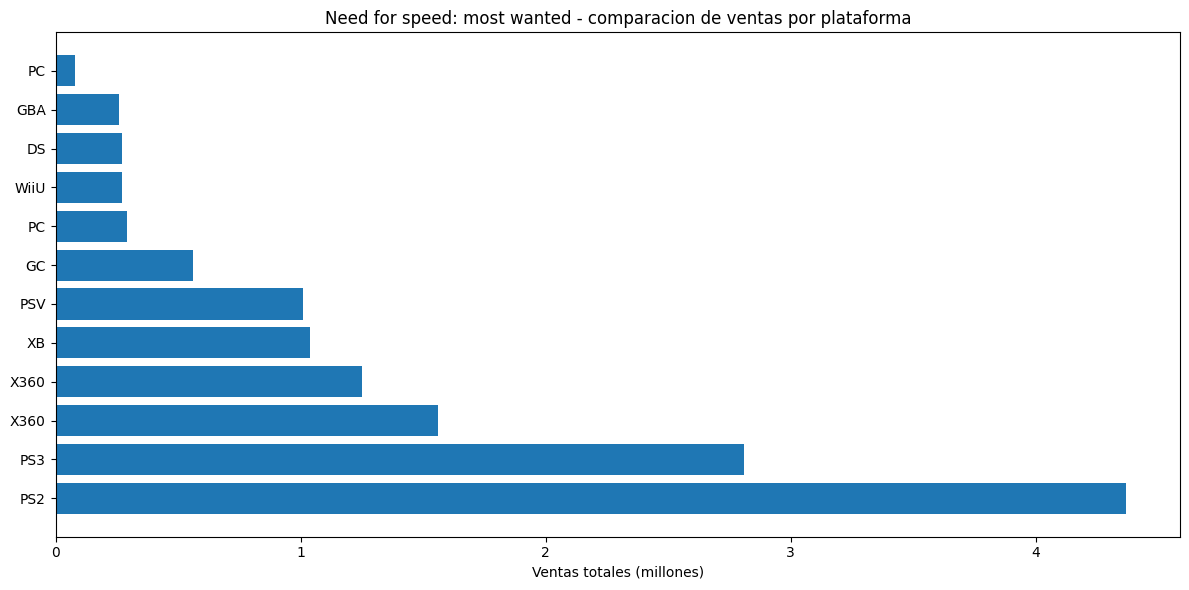

In [35]:
# graficamos 

plt.figure(figsize=(12,6))
juego_filtrado_ordenado = juego_filtrado.sort_values('ventas_totales', ascending = False)
plt.barh(range(len(juego_filtrado_ordenado)), juego_filtrado_ordenado['ventas_totales'])
plt.yticks(range(len(juego_filtrado_ordenado)), juego_filtrado_ordenado['platform'])
plt.xlabel('Ventas totales (millones)')
plt.title('Need for speed: most wanted - comparacion de ventas por plataforma')
plt.tight_layout()
plt.show()


se observa un patron bastante similar al ciclo de vida de las mejores plataformas.
PS2 domina las ventas con 4.37 millones, tuvo su ciclo de vida entre 2000-2011, era la plataformas mas popular cuando se lanzo el juego, coincide con su pico de popularidad.
PS3 con 2.81 millones tuvo su ciclo de vida entre 2006-2016, era una plataforma nueva y en crecimiento.
X360 aparece dos veces 1.56 millones y 1.25 millones, tuvo su ciclo de vida entre 2005-2016, era competencia directa de PS3, las dos entradas posiblemente representen versiones distintas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo analizando los juegos multiplataformas, con esta información es posible relacionar los juegos con mayor popularidad y las plataformas más comercializadas. 

</div>

# Juegos por genero

In [36]:
# contar juegos por genero
juegos_por_genero = df_games['genre'].value_counts()
# imprimimos
print(juegos_por_genero)

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64


In [37]:
# sumamos ventas totales por genero
ventas_por_genero = df_games.groupby('genre')['ventas_totales'].sum().sort_values(ascending = False)
# imprimimos
print(ventas_por_genero)

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: ventas_totales, dtype: float64


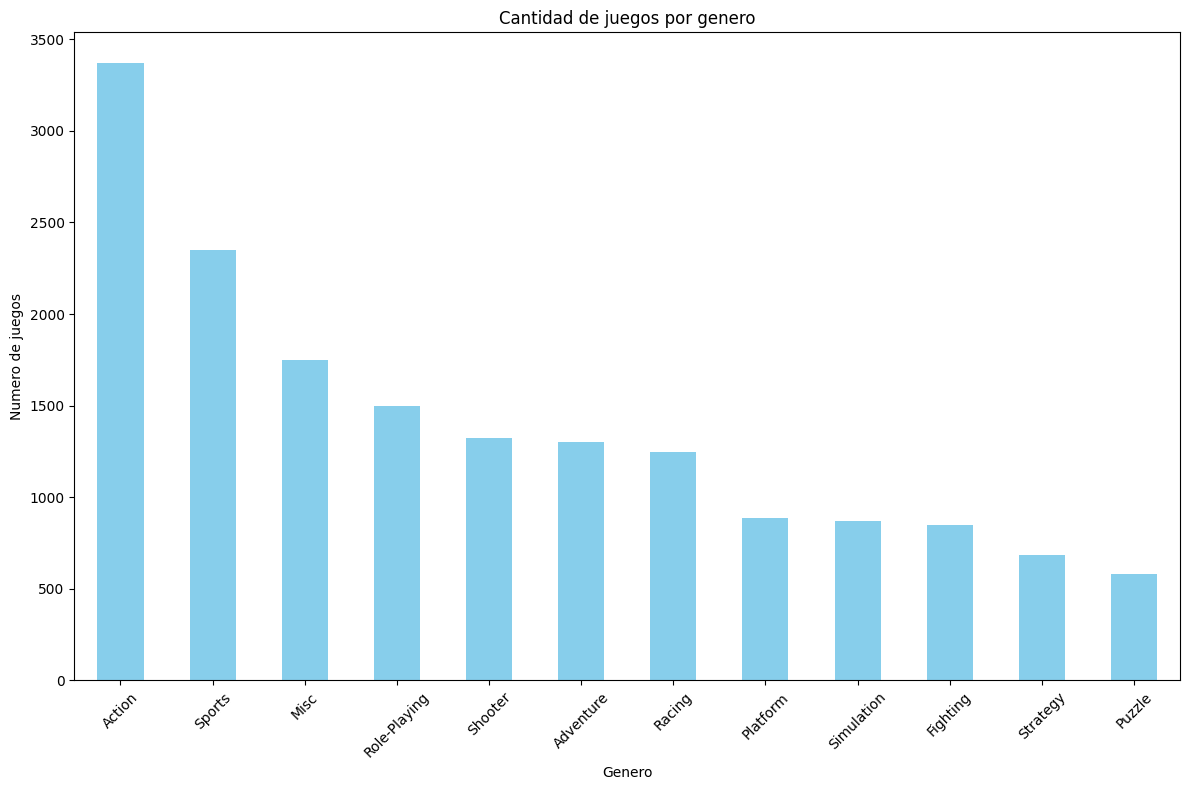

In [38]:
# graficamos
plt.figure(figsize=(12,8))
juegos_por_genero.plot(
    kind = 'bar',
    color = 'skyblue'
)
plt.title('Cantidad de juegos por genero')
plt.xlabel('Genero')
plt.ylabel('Numero de juegos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

entre los generos mas rentables estan: Accion, Sports y Shooter.
los juegos menos rentables estan Strategy, Puzzle y Adventure

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Excelente trabajo! En efecto se observa que los juegos de acción y deportes lideran en ventas. Los géneros de rol y shooter también destacan, aunque en menor medida. En cambio, los de estrategia, aventura y puzzle muestran ventas más bajas, lo que indica una demanda más limitada.

</div>

# perfil de usuario por region

In [39]:
# principales plataformas por region

# plataformas principales Norteamerica
na_plataformas = df_games.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head(5)
# principales plataformas Europa
eu_plataformas = df_games.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head(5)
# principales plataformas Japon
jp_plataformas = df_games.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head(5)


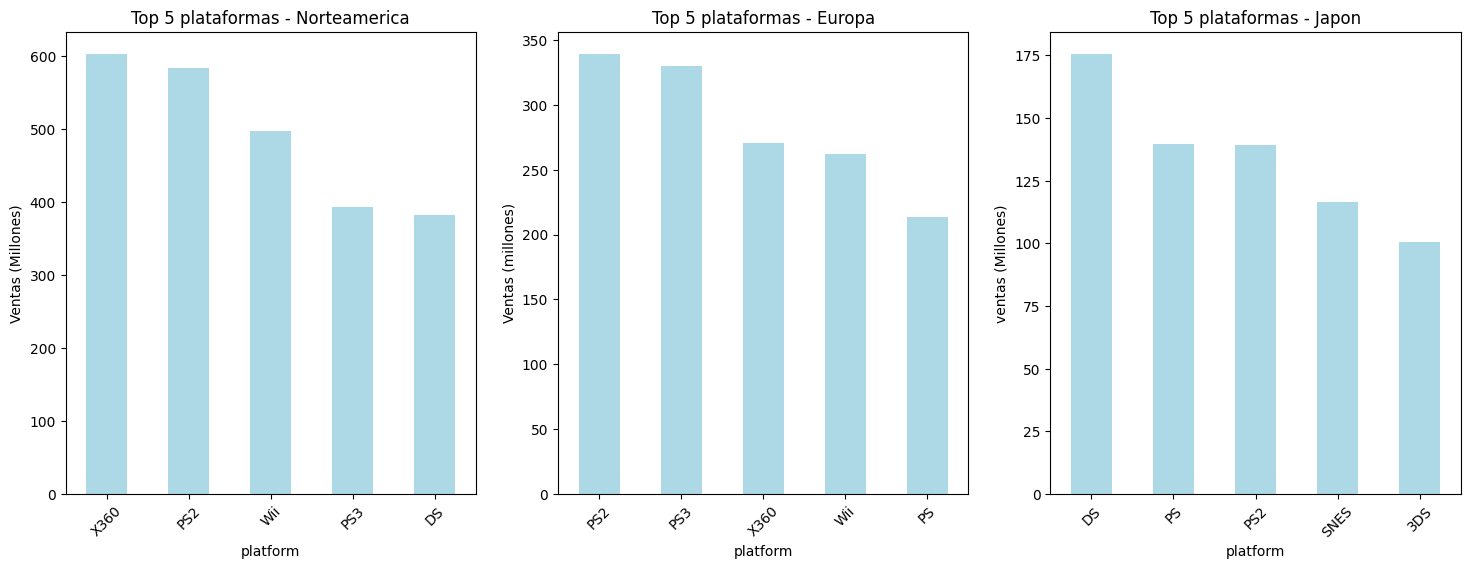

In [40]:
# graficamos
fig, axes = plt.subplots(1, 3,figsize=(18,6))

# graficos por region

# grafico norteamerica
na_plataformas.plot(
    kind = 'bar',
    ax = axes[0],
    color = 'lightblue'
)
axes[0].set_title('Top 5 plataformas - Norteamerica')
axes[0].set_ylabel('Ventas (Millones)')
axes[0].tick_params(axis='x', rotation = 45 )

# grafico europa
eu_plataformas.plot(
    kind = 'bar',
    ax = axes[1],
    color = 'lightblue'
)
axes[1].set_title('Top 5 plataformas - Europa')
axes[1].set_ylabel('Ventas (millones)')
axes[1].tick_params(axis = 'x', rotation = 45)

# grafico japon
jp_plataformas.plot(
    kind = 'bar',
    ax = axes[2],
    color = 'lightblue'
)
axes[2].set_title('Top 5 plataformas - Japon')
axes[2].set_ylabel('ventas (Millones)')
axes[2].tick_params(axis = 'x', rotation = 45)

En cuanto a plataformas en cada region, norteamerica la mas popular es x360 en europa PS2 y japon si prefieren mas Nintendo DS

In [41]:
# principales generos por region

na_generos = df_games.groupby('genre')['na_sales'].sum().sort_values(ascending = False).head(5)
eu_generos = df_games.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).head(5)
jp_generos = df_games.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).head(5)

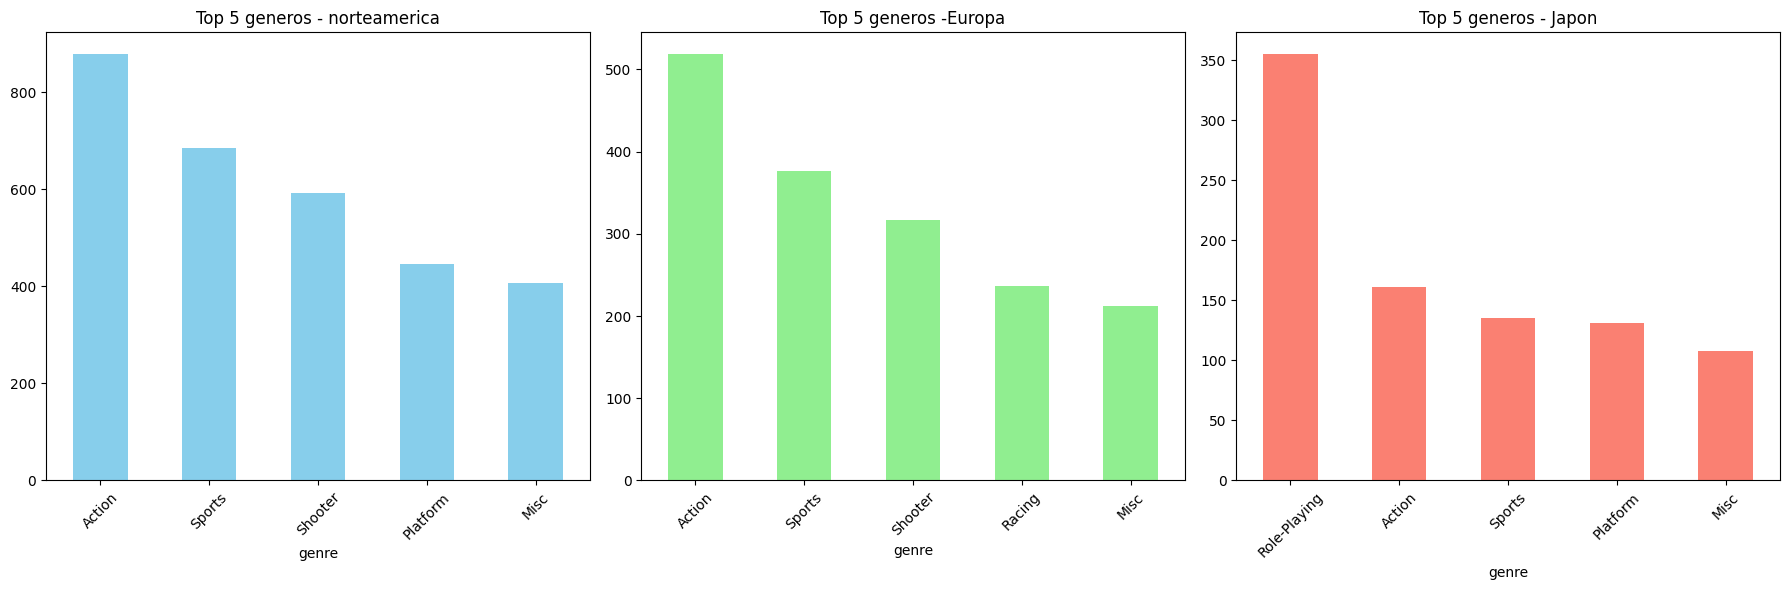

In [42]:
# graficamos
fig, axes = plt.subplots(1,3, figsize=(18,6))
# graficos por region
na_generos.plot(
    kind = 'bar',
    ax = axes[0],
    color = 'skyblue'
)
axes[0].set_title('Top 5 generos - norteamerica')
axes[0].tick_params(axis = 'x', rotation=45)

eu_generos.plot(
    kind = 'bar',
    ax = axes[1],
    color= 'lightgreen'
)
axes[1].set_title('Top 5 generos -Europa')
axes[1].tick_params(axis = 'x', rotation=45)

jp_generos.plot(
    kind= 'bar',
    ax = axes[2],
    color = 'salmon'
)
axes[2].set_title('Top 5 generos - Japon')
axes[2].tick_params(axis = 'x', rotation=45)

plt.tight_layout()
plt.show()

norteamerica y europa tienen generos similares como accion, sports y shooter mientras que japon prefiere role-playing. 

In [43]:
# impacto de clasificaciones ESRB por region

# ventas por clasificacion ESRB en cada region
esrb_na = df_games.groupby('rating')['na_sales'].sum().sort_values(ascending = False)
esrb_eu = df_games.groupby('rating')['eu_sales'].sum().sort_values(ascending = False)
esrb_jp = df_games.groupby('rating')['jp_sales'].sum().sort_values(ascending = False)

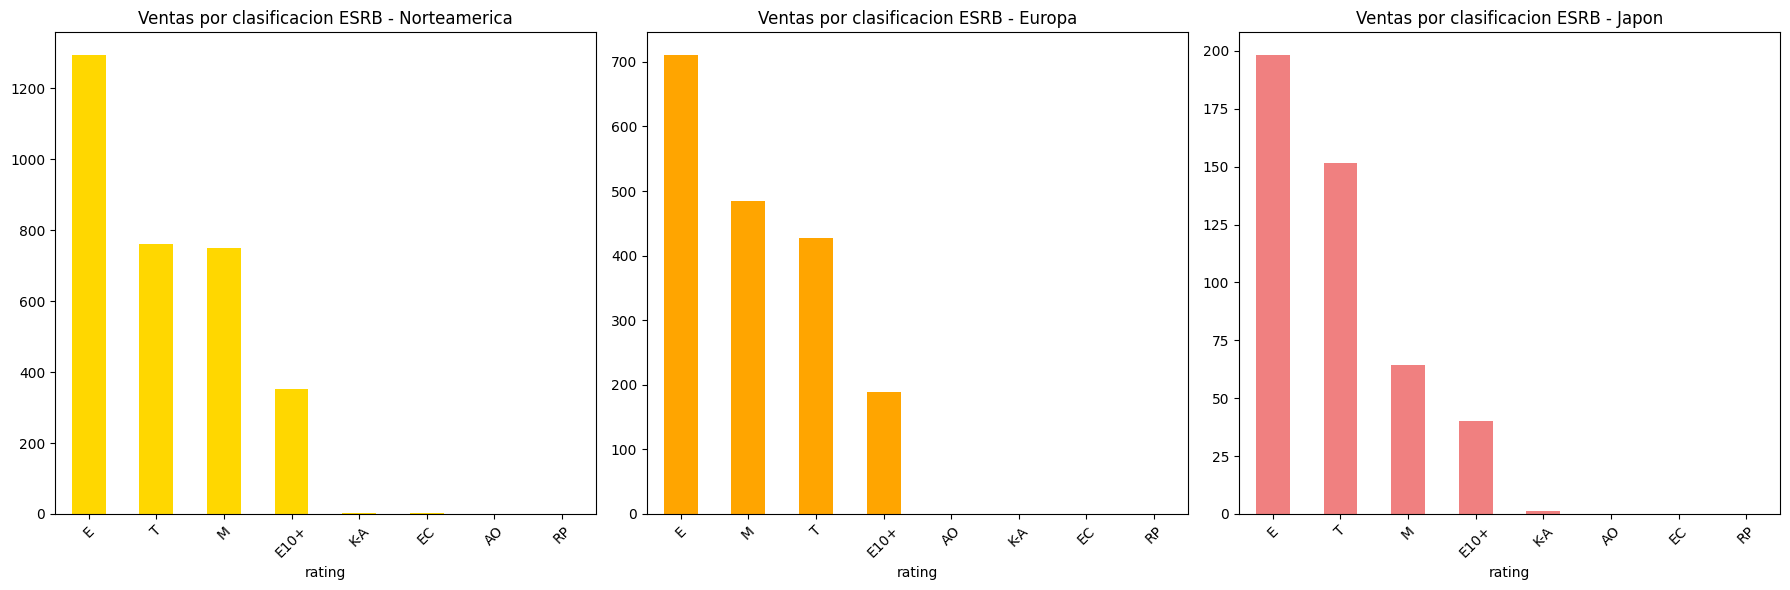

In [44]:
# graficamos 

fig, axes = plt.subplots(1,3, figsize=(18,6))

esrb_na.plot(
    kind = 'bar',
    ax = axes[0],
    color = 'gold'
)
axes[0].set_title('Ventas por clasificacion ESRB - Norteamerica')
axes[0].tick_params(axis = 'x', rotation=45)

esrb_eu.plot(
    kind= 'bar',
    ax = axes[1],
    color = 'orange'
)
axes[1].set_title('Ventas por clasificacion ESRB - Europa')
axes[1].tick_params(axis = 'x', rotation=45)

esrb_jp.plot(
    kind ='bar',
    ax = axes[2],
    color = 'lightcoral'
)
axes[2].set_title('Ventas por clasificacion ESRB - Japon')
axes[2].tick_params(axis = 'x', rotation=45)

plt.tight_layout()
plt.show()

En las tres regiones la clasificacion que mas ventas obtienen es E (para todos), la segunda con mas ventas tanto en norteamerica como japon es T (13 años en adelante) mientras que en europa la segunda clasificacion con mas ventas es M(17 años en adelante)

- los juegos familiares tienen tienen el mayor potencial de ventas globales.
- Europa acepta mayor contenido M(17 años en adelante) mientras que las demas regiones prefieren contenido adolescente T (13 años en adelante)
- se puede priorizar mas contenido E (para todos) y adaptar estrategias regionales.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Kevin has logrado identificar claramente las diferencias entre América del Norte, Europa y Japón, no solo en términos de plataformas y géneros predominantes, sino también en la influencia de las clasificaciones ESRB, lo que refleja tu capacidad para conectar datos con tendencias culturales y de comportamiento. 

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Para lograr un análisis comparativo más efectivo, sería beneficioso presentar cada sección de información empleando un único diagrama de barras. Al asignar un color distintivo a cada región, podremos crear una representación visual unificada que facilite la identificación de patrones y diferencias entre las distintas áreas. Esta consolidación de datos no solo optimizará el espacio visual, sino que también permitirá al lector establecer conexiones y comparaciones de manera más intuitiva y directa entre los distintos conjuntos de información. Acá te muestro un ejemplo 

<img src="https://www.analyticslane.com/storage/2022/06/matplotlib-barras-adyacentes.png.webp" width="400">

En el siguiente enlace se explica cómo se puede construir: [Gráficos de Barras](https://www.analyticslane.com/2022/07/05/graficos-de-barras-en-matplotlib/)

</div>
</div>

# prueba de hipotesis


In [45]:
# filtramos los datos para xbox one y pc sin valores nulos

xbox_rating = df_games[(df_games['platform']=='XOne') & (df_games['user_score'].notna())]['user_score']
pc_rating = df_games[(df_games['platform']=='PC') & (df_games['user_score'].notna())]['user_score']

# filtrar datos para generos accion y deportes sin valores nulos

accion_raiting = df_games[(df_games['genre']=='Action') & (df_games['user_score'].notna())]['user_score']
deportes_raiting = df_games[(df_games['genre']=='Sports') & (df_games['user_score'].notna())]['user_score']

# verificamos si tenemos datos suficientes
print('tamaños de muestra')
print(f'Xbox One: {len(xbox_rating)} juegos')
print(f'PC: {len(pc_rating)} juegos')
print(f'Accion: {len(accion_raiting)} juegos')
print(f'Deportes: {len(deportes_raiting)} juegos')

tamaños de muestra
Xbox One: 182 juegos
PC: 770 juegos
Accion: 1830 juegos
Deportes: 1103 juegos


In [46]:
# establecemos el nivel de significancia

alpha = 0.05
print(f'Nivel de significancia (α): {alpha}')
# ACEPTAMOS un 5% de riesgo de error

Nivel de significancia (α): 0.05


In [47]:
# realizamos pruebas estadisticas

# Hipotesis 1: Xbox One VS PC
print('*'*25)
print('Hipotesis 1: Xbox One vs PC')
print('*'*25)

# Formulacion de hipotesis
print('H0: las calificaciones promedio son IGUALES (u_xbox = u_pc)')
print('H1: las calificaciones promedio son DIFERENTES (u_xbox != u_pc)')
print()

# Estadisticas descriptivas
print('Estaditicas descriptivas: ')
print(f'Xbox One - Media: {xbox_rating.mean():.3f}, Desviacion estandar: {xbox_rating.std():.3f}')
print(F'PC - Media: {pc_rating.mean():.3f}, Desviacion estandar: {pc_rating.std():.3f}')
print()

# realizamos prueba t de student (dos muestras independientes)
t_stat1, p_value1 = stats.ttest_ind(xbox_rating, pc_rating)

print(f'Estadistico t: {t_stat1:.4f}')
print(f'valor p: {p_value1:.4f}')
print(f'Nivel de significancia: {alpha}')
print()

# Interpretacion
if p_value1 < alpha:
    print('Decision: Rechazamos H0')
    print('Conclusion: Hay evidencia estadistica de que las calificaciones promedio son DIFERENTES')
else:
    print('Decision: No rechazamos H0')
    print('Conclusion: No hay evidencia suficiente para afirmar que las calificaciones son diferentes')

*************************
Hipotesis 1: Xbox One vs PC
*************************
H0: las calificaciones promedio son IGUALES (u_xbox = u_pc)
H1: las calificaciones promedio son DIFERENTES (u_xbox != u_pc)

Estaditicas descriptivas: 
Xbox One - Media: 6.521, Desviacion estandar: 1.381
PC - Media: 7.062, Desviacion estandar: 1.530

Estadistico t: -4.3683
valor p: 0.0000
Nivel de significancia: 0.05

Decision: Rechazamos H0
Conclusion: Hay evidencia estadistica de que las calificaciones promedio son DIFERENTES


In [48]:
# Hipotesis 2: Accion vs Deportes
print('*'*25)
print('Hipotesis 2:  Accion vs Deportes')
print('*'*25)

# formulacion de hipotesis
print('H0: las calificaciones promedio son IGUALES (u_accion = u_deportes)')
print('H1: las calificaciones promedio son DIFERENTES (u_accion != u_deportes)')
print()

# Estadisticas descriptivas
print('Estadisticas descriptivas: ')
print(f'Accion - Media: {accion_raiting.mean():.3f}, Desviacion estandar: {accion_raiting.std():.3f}')
print(f'Deportes - Media: {deportes_raiting.mean():.3f}, Desviacion estandar: {deportes_raiting.std():.3f}')
print()

# realizamos prueba t de student (dos muestras independientes)
t_stat2, p_value2 = stats.ttest_ind(accion_raiting, deportes_raiting)

print(f'Estadistico t: {t_stat2:.4f}')
print(f'Valor p: {p_value2:.4f}')
print(f'Nivel de significancia {alpha}')
print()

# Interpretacion
if p_value2 < alpha:
    print('Decision: Rechazamos H0')
    print('Conclusion: hay evidencia estadistica de que las calificaciones promedio son DIFERENTES')
else:
    print('Decision: no rechazamos H0')
    print('Conclusion: No hay evidencia suficiente para afirmar que las calificaciones son diferentes')

*************************
Hipotesis 2:  Accion vs Deportes
*************************
H0: las calificaciones promedio son IGUALES (u_accion = u_deportes)
H1: las calificaciones promedio son DIFERENTES (u_accion != u_deportes)

Estadisticas descriptivas: 
Accion - Media: 7.054, Desviacion estandar: 1.425
Deportes - Media: 6.961, Desviacion estandar: 1.611

Estadistico t: 1.6259
Valor p: 0.1041
Nivel de significancia 0.05

Decision: no rechazamos H0
Conclusion: No hay evidencia suficiente para afirmar que las calificaciones son diferentes


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Kevin aplicaste correctamente las prueba de hipótesis comparando las distribuciones dos muestras independientes e interpretando de manera acertada el *p-value* obtenido y su relación con la hipótesis nula

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Te recomiendo realizar previamente una prueba de [Levene](https://www.educaopen.com/digital-lab/blog/educacion-digital/prueba-de-levene) para evaluar la igualdad de las varianzas, lo que te permitirá configurar adecuadamente el parámetro **equal_var** en la función `ttest_ind`. Esto servirá para tener una interpretación más precisa de los resultados además garantizará que la prueba t sea estadísticamente válida.

</div>
</div>

# Conclusion


para las plataformas de Xbox One y PC:
- las calificaciones de usuarios son estadisticamente DIFERENTES.
- PC recibe mejores calificaciones que Xbox One.
- la plataforma SI influye significativamente en cómo califican los usuarios.

para los generos Accion y Deportes:
- los generos NO tienen diferencias significativas en calificaciones.
- los usuarios califican de manera similar ambos generos.
- el genero NO influye significativamente en las calificaciones.